In [3]:
import pandas as pd


In [4]:
# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")  

# Show the first 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Data type: {df[col].dtype}")
    print(f"Missing values: {df[col].isnull().sum()}")

Column: gender
Unique values: ['female' 'male']
Number of unique values: 2
Data type: object
Missing values: 0
Column: race/ethnicity
Unique values: ['group B' 'group C' 'group A' 'group D' 'group E']
Number of unique values: 5
Data type: object
Missing values: 0
Column: parental level of education
Unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Number of unique values: 6
Data type: object
Missing values: 0
Column: lunch
Unique values: ['standard' 'free/reduced']
Number of unique values: 2
Data type: object
Missing values: 0
Column: test preparation course
Unique values: ['none' 'completed']
Number of unique values: 2
Data type: object
Missing values: 0
Column: math score
Unique values: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99

In [7]:
data = df.copy()

#Binary encoding
data['gender']  = data['gender'].map({'female': 0, 'male': 1})

data['lunch'] = data['lunch'].map({'free/reduced': 0, 'standard': 1})

data['test preparation course'] = data['test preparation course'].map({'none': 0, 'completed': 1})

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,1,0,72,72,74
1,0,group C,some college,1,1,69,90,88
2,0,group B,master's degree,1,0,90,95,93
3,1,group A,associate's degree,0,0,47,57,44
4,1,group C,some college,1,0,76,78,75


In [8]:
#Ordinal encoding
education_order = {
    'some high school': 0,
    'high school': 1,
    "associate's degree": 2,
    'some college': 3,
    "bachelor's degree": 4,
    "master's degree": 5
}

data['parental level of education'] = data['parental level of education'].map(education_order)

In [9]:
# One-hot encode 'race/ethnicity'
data = pd.get_dummies(data, columns=['race/ethnicity'], prefix='ethnicity')
data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E
0,0,4,1,0,72,72,74,False,True,False,False,False
1,0,3,1,1,69,90,88,False,False,True,False,False
2,0,5,1,0,90,95,93,False,True,False,False,False
3,1,2,0,0,47,57,44,True,False,False,False,False
4,1,3,1,0,76,78,75,False,False,True,False,False


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   parental level of education  1000 non-null   int64
 2   lunch                        1000 non-null   int64
 3   test preparation course      1000 non-null   int64
 4   math score                   1000 non-null   int64
 5   reading score                1000 non-null   int64
 6   writing score                1000 non-null   int64
 7   ethnicity_group A            1000 non-null   bool 
 8   ethnicity_group B            1000 non-null   bool 
 9   ethnicity_group C            1000 non-null   bool 
 10  ethnicity_group D            1000 non-null   bool 
 11  ethnicity_group E            1000 non-null   bool 
dtypes: bool(5), int64(7)
memory usage: 59.7 KB


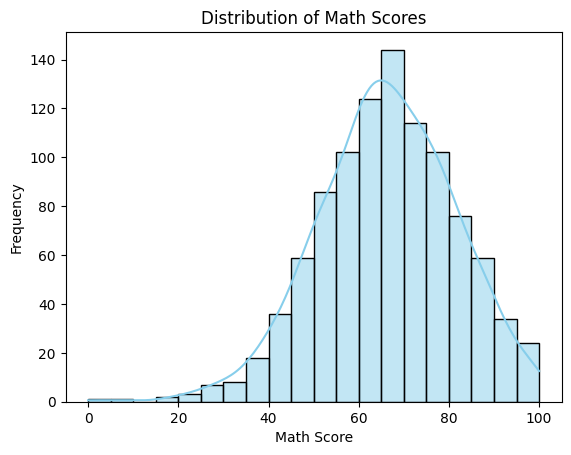

In [ ]:
import seaborn as sns

sns.histplot(data['math score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()


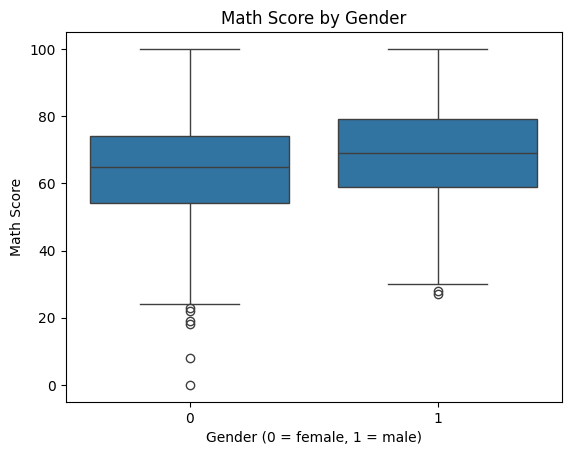

In [ ]:
sns.boxplot(x='gender', y='math score', data=data)
plt.title('Math Score by Gender')
plt.xlabel('Gender (0 = female, 1 = male)')
plt.ylabel('Math Score')
plt.show()


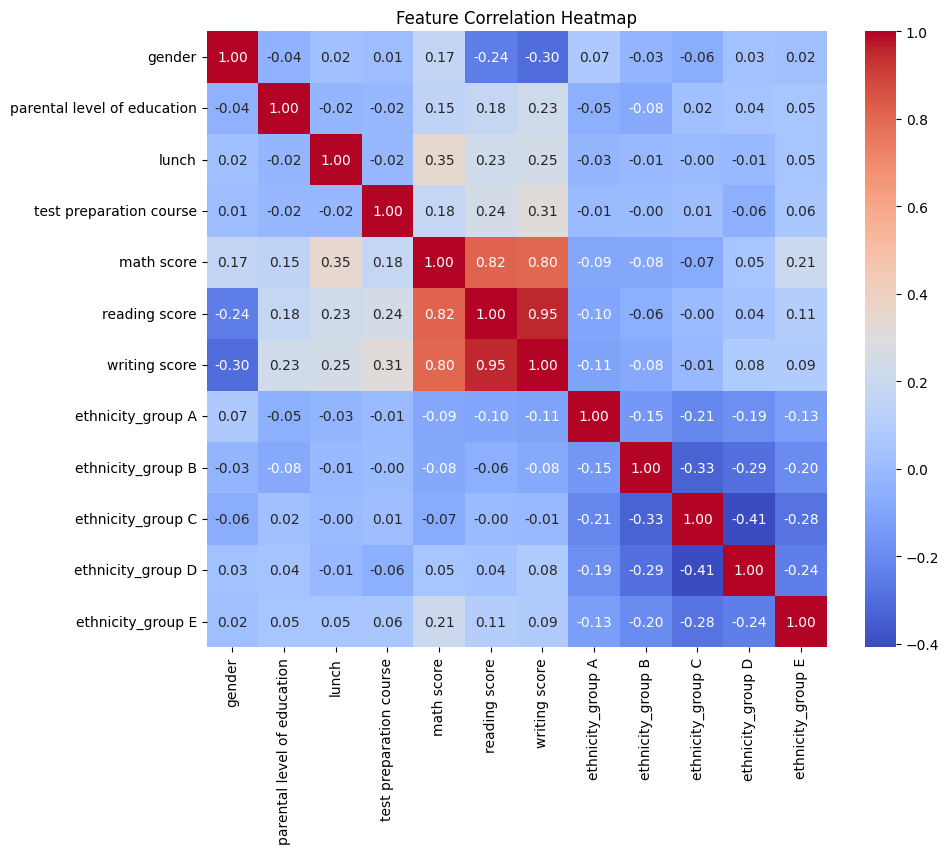

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_13768\1034424532.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='math score', data=df, palette='pastel')


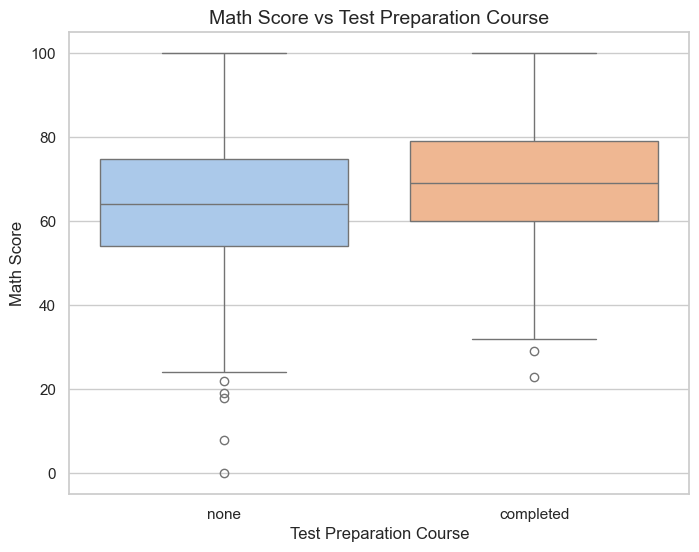

In [27]:
# Set plot style
sns.set(style="whitegrid")

# Plot boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='test preparation course', y='math score', data=df, palette='pastel')

plt.title('Math Score vs Test Preparation Course', fontsize=14)
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['reading score', 'writing score', 'test preparation course']]
y = data['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Absolute Error: 4.169217587529679
Mean Squared Error: 28.533608917238375
R² Score: 0.8827410350473317


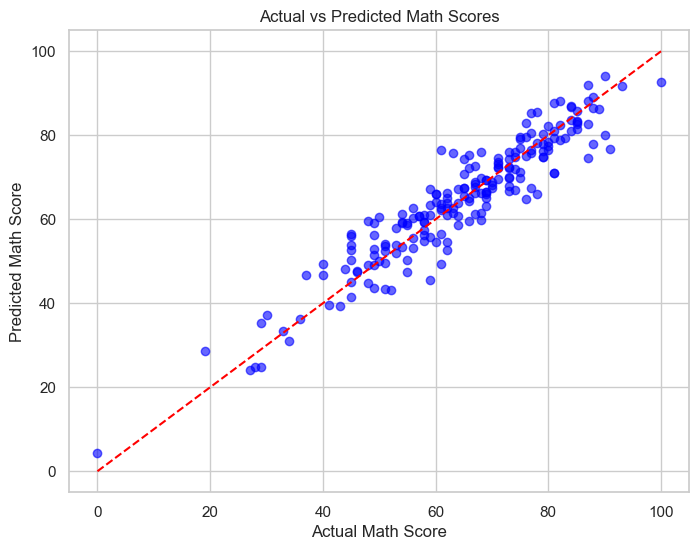

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()

In [34]:
import joblib
joblib.dump(model, 'linear_model.pkl')


['linear_model.pkl']